In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('diabetes.csv')

In [6]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [18]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [19]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [20]:
# Bağımsız değişkenler (Özellikler)
X = data.drop(columns=['Outcome'])

# Bağımlı değişken (Hedef)
y = data['Outcome']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
scaler = StandardScaler()

# Eğitim verisini ölçeklendirme
X_train_scaled = scaler.fit_transform(X_train)

# Test verisini ölçeklendirme
X_test_scaled = scaler.transform(X_test)

In [48]:
# KNN Classifier modelini oluşturma
knn_5 = KNeighborsClassifier(n_neighbors=5)

# Modeli eğitim verisi ile eğitme
knn_5.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [44]:
# Test veri seti üzerinde tahmin yapma
y_pred_5 = knn.predict(X_test_scaled)

# Doğruluk oranını hesaplama
accuracy_5 = accuracy_score(y_test, y_pred_5)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7597402597402597


In [49]:
# Confusion Matrix
conf_matrix_5 = confusion_matrix(y_test, y_pred_5)
print(conf_matrix_5)

[[79 20]
 [27 28]]


In [50]:
# Classification Report
class_report_5 = classification_report(y_test, y_pred_5)
print(class_report_5)

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



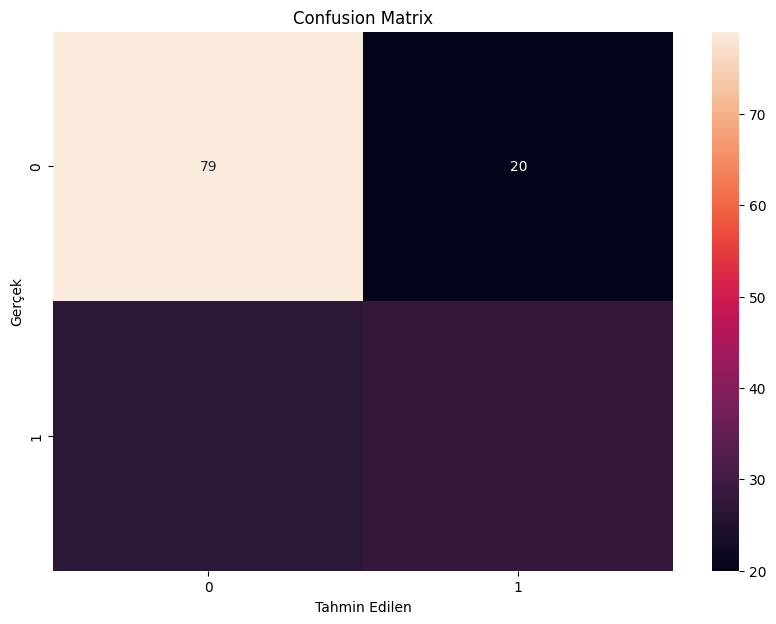

In [30]:
# Confusion Matrix'i görselleştirme
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

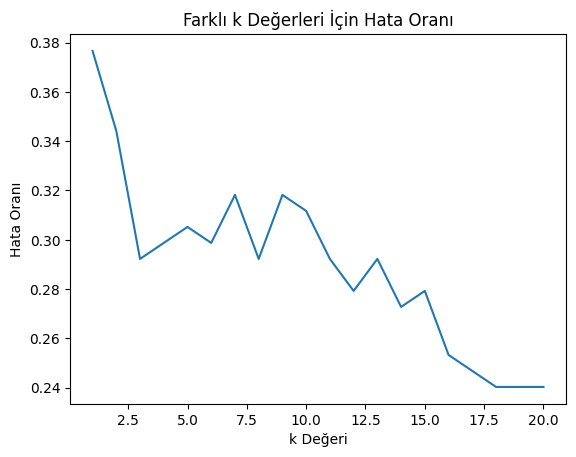

In [32]:
# Farklı k değerleri için performansı değerlendirme
errors = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    errors.append(1 - accuracy)
    
# Hata değerlerini görselleştirme
plt.plot(k_values, errors)
plt.xlabel('k Değeri')
plt.ylabel('Hata Oranı')
plt.title('Farklı k Değerleri İçin Hata Oranı')
plt.show()


In [33]:
# En iyi k değerini belirleme
best_k = k_values[errors.index(min(errors))]
print(f'En İyi k Değeri: {best_k}')

En İyi k Değeri: 18


In [34]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=18)

In [35]:
# Modelin performansını değerlendirme
y_pred_best = knn_best.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy with k={best_k}: {accuracy_best}')

Accuracy with k=18: 0.7597402597402597


In [36]:
# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print(conf_matrix_best)

[[88 11]
 [26 29]]


In [37]:
# Classification Report
class_report_best = classification_report(y_test, y_pred_best)
print(class_report_best)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.72      0.53      0.61        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



In [51]:
# Karşılaştırma ve Yorumlama
print("k=5 ile k={} karşılaştırması".format(best_k))
print("k=5 Doğruluk Oranı:", accuracy_5)
print("k={} Doğruluk Oranı:".format(best_k), accuracy_best)

if accuracy_best > accuracy_5:
    print("En iyi k değeri olan {} ile model daha iyi performans göstermektedir.".format(best_k))
else:
    print("Başlangıçta belirlenen k=5 değeri ile model daha iyi performans göstermektedir.")

k=5 ile k=18 karşılaştırması
k=5 Doğruluk Oranı: 0.6948051948051948
k=18 Doğruluk Oranı: 0.7597402597402597
En iyi k değeri olan 18 ile model daha iyi performans göstermektedir.


## `Sonuç`

Bu projede, diyabet veri seti kullanılarak KNN algoritması ile tahmin modelleri oluşturdum. Farklı k değerlerinin model performansı üzerindeki etkisi inceledim ve en iyi k değeri belirledim. Sonuç olarak, en iyi k değeri olan 18 ile modelin doğruluk oranı %75.97'ye ulaşmıştır. Bu, diyabet tahmininde kullanılabilecek etkili bir model olduğunu göstermektedir.